In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter
from astropy.constants import h, c, e
sns.set_style('darkgrid')

In [15]:
def float_formatter(x, pos):
    """
    Format a floating-point number with one decimal place.

    Parameters:
    - x (float): The floating-point number to be formatted.
    - pos (int): The tick position (ignored in this function).

    Returns:
    str: A formatted string representation of the floating-point number with one decimal place.
    """
    return f"{x:.6f}"

def float_formatter_aux(x, pos):
    """
    Format a floating-point number with one decimal place.

    Parameters:
    - x (float): The floating-point number to be formatted.
    - pos (int): The tick position (ignored in this function).

    Returns:
    str: A formatted string representation of the floating-point number with one decimal place.
    """
    return f"{x:.4f}"

In [3]:
# Medidas de potencial de corte (V0) em mV
v_0 = [10.1, 32.8, 371, 304]
# Convertendo mV para V
v_0 = [v / 1000 for v in v_0]

# Comprimentos de onda (λ) em Å
_lambda = [5770, 5461, 4358, 4047]
# Calculando o inverso do comprimento de onda (λ⁻¹) em Å⁻¹
_lambda = list(map(lambda x: 1.000 / x, _lambda))

result = linregress(_lambda, v_0)
stats = (result.slope, result.intercept, result.rvalue, result.pvalue, result.stderr, result.intercept_stderr)

In [4]:
v_0

[0.0101, 0.032799999999999996, 0.371, 0.304]

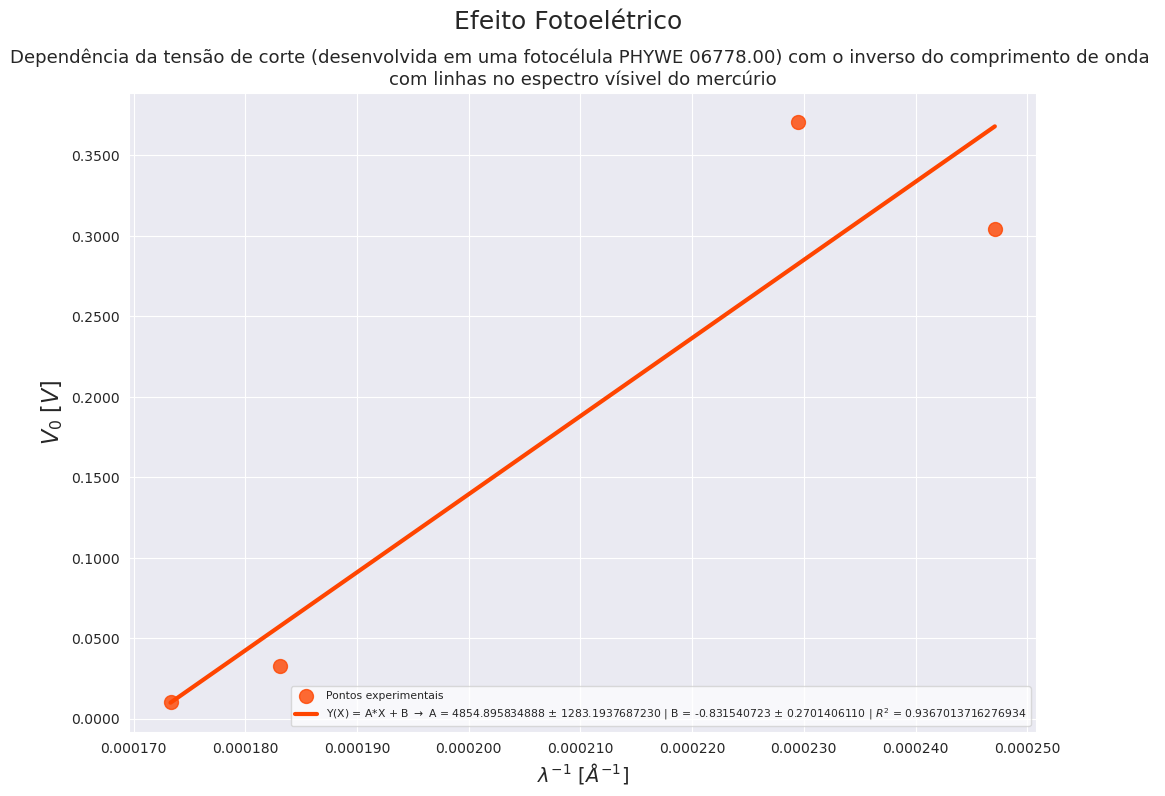

In [21]:
f = plt.figure(figsize=(11.7, 8.3))
plt.suptitle(r'Efeito Fotoelétrico', fontsize=18)
plt.title('Dependência da tensão de corte (desenvolvida em uma fotocélula PHYWE 06778.00) com o inverso do comprimento de onda \ncom linhas no espectro vísivel do mercúrio', fontsize=13.0)
sns.regplot(x=_lambda, y=v_0, color='orangered', ci=None, scatter_kws={'s' : 100, 'color' : 'orangered'}, line_kws={'lw' : 3, 'color' : 'orangered'})
plt.legend(['Pontos experimentais', fr'Y(X) = A*X + B $\rightarrow$ A = {stats[0]:.9f} $\pm$ {stats[4]:.10f} | B = {stats[1]:.9f} $\pm$ {stats[5]:.10f} | $R^2$ = {stats[2]}'], frameon=True, facecolor='white', framealpha=0.7, fontsize=7.8, loc='lower right')
plt.gca().xaxis.set_major_formatter(FuncFormatter(float_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(float_formatter_aux))
plt.xlabel(r'$\lambda^{-1}}$ $[\AA^{-1}]$', fontsize=14.0)
plt.ylabel(r'$V_{0}\ [V]$', fontsize=16)
plt.savefig('EfeitoFotoeletrico_regression.pdf')
plt.show()

In [98]:
# Parâmetros do ajuste
A, B = result.slope, result.intercept
uncertainty_A = result.stderr  # Incerteza associada ao coeficiente angular

# Cálculo da constante de Planck (h)
h = (A * (e.value / c.value)) * 10e-10  # Resultado em J·s

# Propagação de erro
partial_derivative_A = (e.value / c.value)
uncertainty_h = np.sqrt((partial_derivative_A * uncertainty_A) ** 2)

# Imprimir resultados
print(f'Constante de Planck (h): {h:.4e} J·s ± {uncertainty_h:.4e} J·s')


Constante de Planck (h): 2.5946e-33 J·s ± 6.8578e-25 J·s


Constante de Planck (h): 2.5942e-34 J·s ± 6.8568e-35 J·s


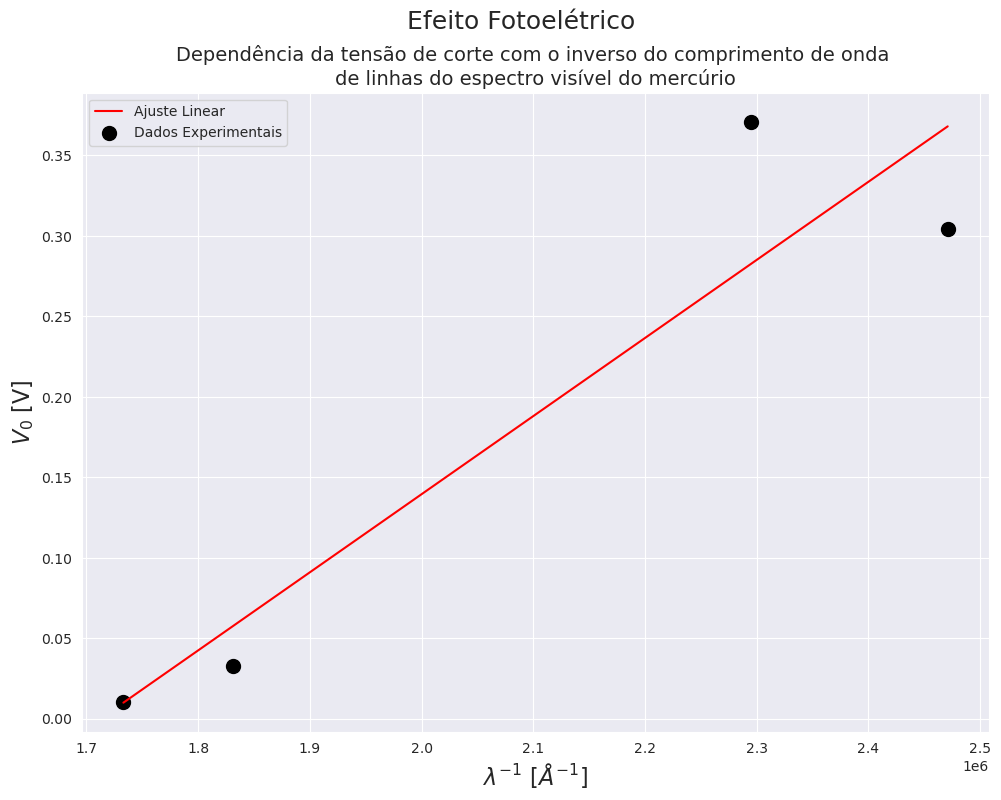

In [59]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Dados
v_0 = np.array([10.1, 32.8, 371, 304]) / 1000  # Convertendo mV para V
_lambda = np.array([5770, 5461, 4358, 4047]) * 10e-11

# Calculando o inverso do comprimento de onda (λ⁻¹) em Å⁻¹
inv_lambda = 1.00 / _lambda

# Ajuste linear
result = linregress(inv_lambda, v_0)

# Parâmetros do ajuste
A, B = result.slope, result.intercept
uncertainty_A = result.stderr  # Incerteza associada ao coeficiente angular

e = 1.602e-19  # Carga elementar em coulombs
c = 2.998e8  # Velocidade da luz em m/s

# Cálculo da constante de Planck (h)
h = A * (e / c)  # Resultado em J·s
uncertainty_h = uncertainty_A * (e / c)  # Propagação de erro

# Imprimir resultados
print(f'Constante de Planck (h): {h:.4e} J·s ± {uncertainty_h:.4e} J·s')

# Gráfico
plt.figure(figsize=(11.7, 8.3))
plt.suptitle('Efeito Fotoelétrico', fontsize=18)
plt.title('Dependência da tensão de corte com o inverso do comprimento de onda \nde linhas do espectro visível do mercúrio', fontsize=14)
plt.plot(inv_lambda, (A * inv_lambda) + B, color='red', label='Ajuste Linear')
plt.scatter(inv_lambda, v_0, color='black', label='Dados Experimentais', s=100)
plt.xlabel(r'$\lambda^{-1}$ [$\AA^{-1}$]', fontsize=16)
plt.ylabel('$V_{0}$ [V]', fontsize=16)
plt.legend()
plt.show()

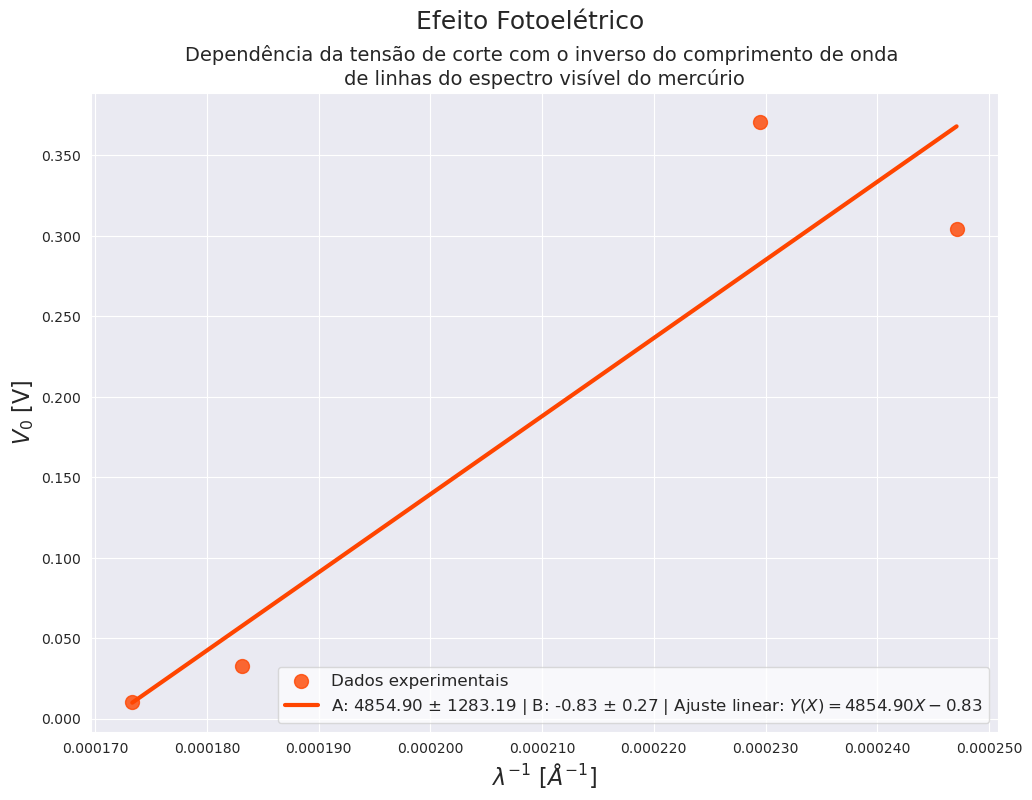

Constante de Planck (h): 2.5946e-33 J·s ± 6.8578e-34 J·s


In [124]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress
from matplotlib.ticker import FuncFormatter
from astropy.constants import h, c, e

sns.set_style('darkgrid')

# Medidas de potencial de corte (V0) em mV
v_0 = np.array([10.1, 32.8, 371, 304]) / 1000  # Convertendo mV para V

# Comprimentos de onda (λ) em Å
_lambda = np.array([5770, 5461, 4358, 4047])

# Calculando o inverso do comprimento de onda (λ⁻¹) em Å⁻¹
inv_lambda = 1.000 / _lambda

# Ajuste linear
result = linregress(inv_lambda, v_0)
stats = (result.slope, result.intercept, result.rvalue, result.pvalue, result.stderr, result.intercept_stderr)

# Gráfico
f = plt.figure(figsize=(11.7, 8.3))
plt.suptitle('Efeito Fotoelétrico', fontsize=18)
plt.title('Dependência da tensão de corte com o inverso do comprimento de onda \nde linhas do espectro visível do mercúrio', fontsize=14)
sns.regplot(x=inv_lambda, y=v_0, color='orangered', ci=None, scatter_kws={'s': 100, 'color': 'orangered'},
            line_kws={'lw': 3, 'color': 'orangered'})
plt.legend(['Dados experimentais',
            fr'A: {stats[0]:.2f} $\pm$ {stats[4]:.2f} | B: {stats[1]:.2f} $\pm$ {stats[5]:.2f} | Ajuste linear: $Y(X) = {stats[0]:.2f}X {stats[1]:.2f}$'],
            frameon=True, facecolor='white', framealpha=0.7, fontsize='large', loc='lower right')
plt.gca().xaxis.set_major_formatter(FuncFormatter(float_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(float_formatter_aux))
plt.xlabel(r'$\lambda^{-1}$ [$\AA^{-1}$]', fontsize=16)
plt.ylabel('$V_{0}$ [V]', fontsize=16)
plt.show()

# Parâmetros do ajuste
A, B = stats[0], stats[1]
uncertainty_A = stats[4]  # Incerteza associada ao coeficiente angular

# Cálculo da constante de Planck (h)
h_calculated = (A * (e.value / c.value)) * 10e-10  # Resultado em J·s

# Propagação de erro
partial_derivative_A = e.value / c.value
uncertainty_h = np.sqrt((partial_derivative_A * uncertainty_A) ** 2) * 10e-10

# Imprimir resultados
print(f'Constante de Planck (h): {h_calculated:.4e} J·s ± {uncertainty_h:.4e} J·s')